# ESRI Land Cover

This notebook is a simple example of loading ESRI's global 10 m Land Cover dataset.
For more information, see [the ESRI data page](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac).

In [1]:
import datacube

from matplotlib import colors as mcolours
import numpy as np

%matplotlib inline

dc = datacube.Datacube()

In [2]:
product = "io_lulc"
# This is a point in Hobart
lat, lon = -42.822771, 147.234277
buf = 0.25
lons = (lon - buf, lon + buf)
lats = (lat - buf, lat + buf)

# Load the data at 10 m resolution
ds = dc.load(
    product=product,
    longitude=lons,
    latitude=lats,
    resolution=(-10, 10),
    output_crs="epsg:6933"
)

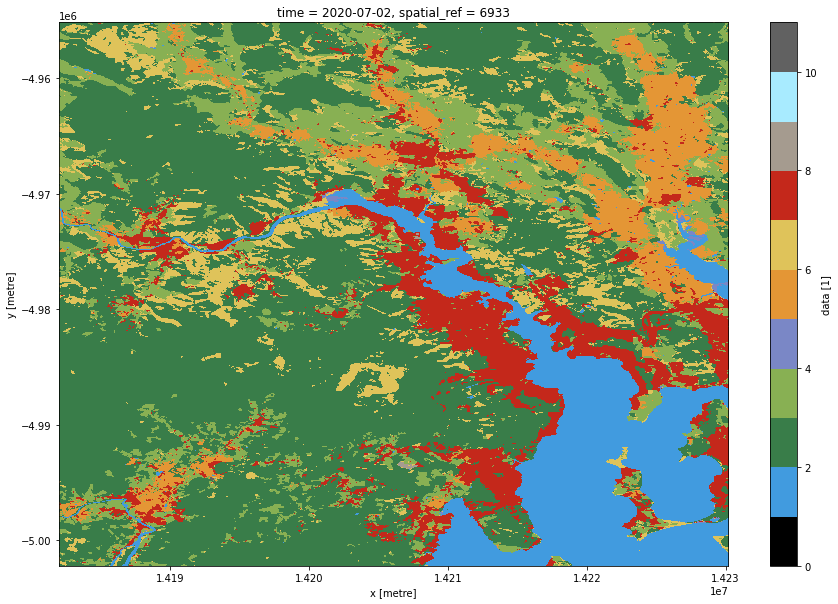

In [3]:
# Colour it like the ESRI colour map
cmap = mcolours.ListedColormap([
      np.array([0, 0, 0]) / 255,
      np.array([65, 155, 223]) / 255,
      np.array([57, 125, 73]) / 255,
      np.array([136, 176, 83]) / 255,
      np.array([122, 135, 198]) / 255,
      np.array([228, 150, 53]) / 255,
      np.array([223, 195, 90]) / 255,
      np.array([196 ,40, 27]) / 255,
      np.array([165, 155, 143]) / 255,
      np.array([168, 235, 255]) / 255,
      np.array([97, 97, 97]) / 255
])
bounds=range(0,12)
norm = mcolours.BoundaryNorm(np.array(bounds), cmap.N)
ds.isel(time=0).data.plot.imshow(cmap=cmap, norm=norm, size=10)

In [4]:
# This is the centre of Australia, approximately
lat, lon = -26.621795, 135.110935
buf = 18
lons = (lon - buf, lon + buf)
lats = (lat - buf, lat + buf)

# Load the data at 10 m resolution
ds_au = dc.load(
    product=product,
    longitude=lons,
    latitude=lats,
    resolution=(-1000, 1000),
    output_crs="epsg:6933",
    dask_chunks={}  # Use dask to make it lazy load
)

In [ ]:
%%time
ds_au.isel(time=0).data.plot.imshow(cmap=cmap, norm=norm, size=10)